In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np

In [2]:
muestra=pd.read_csv('../data/muestra.csv')


In [3]:
muestra.head()

,id,salary_in_usd
0,0,70377
1,1,85839
2,2,63613
3,3,88561
4,4,37621


In [4]:
salaries = pd.read_csv('../data/salaries_data.csv')

In [5]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [6]:
testeo = pd.read_csv('../data/testeo.csv')

In [7]:
testeo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [8]:
salaries.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary              500 non-null    int64 
 5   salary_currency     500 non-null    object
 6   salary_in_usd       500 non-null    int64 
 7   employee_residence  500 non-null    object
 8   remote_ratio        500 non-null    int64 
 9   company_location    500 non-null    object
 10  company_size        500 non-null    object
dtypes: int64(4), object(7)
memory usage: 224.3 KB


In [9]:
salaries.shape

(500, 11)

In [10]:
testeo.shape

(107, 10)

In [11]:
salaries2 = salaries.copy()
y=salaries2.salary_in_usd

In [12]:
salaries2.drop('salary_in_usd',axis=1,inplace=True)

In [13]:
salaries2.shape

(500, 10)

In [14]:
salaries3 = pd.concat([salaries2, testeo]).reset_index()

In [15]:
salaries3.drop('index',axis=1,inplace=True)

In [16]:
salaries3

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,RO,0,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Analyst,170000,USD,US,100,US,M
603,2022,SE,FT,Data Architect,192564,USD,US,100,US,M
604,2022,SE,FT,Data Scientist,230000,USD,US,100,US,M
605,2022,EN,FT,Data Analyst,52000,USD,CA,0,CA,M


In [17]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(salaries3.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salaries.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

ValueError: Mask must have the same shape as data.

<Figure size 1080x720 with 0 Axes>

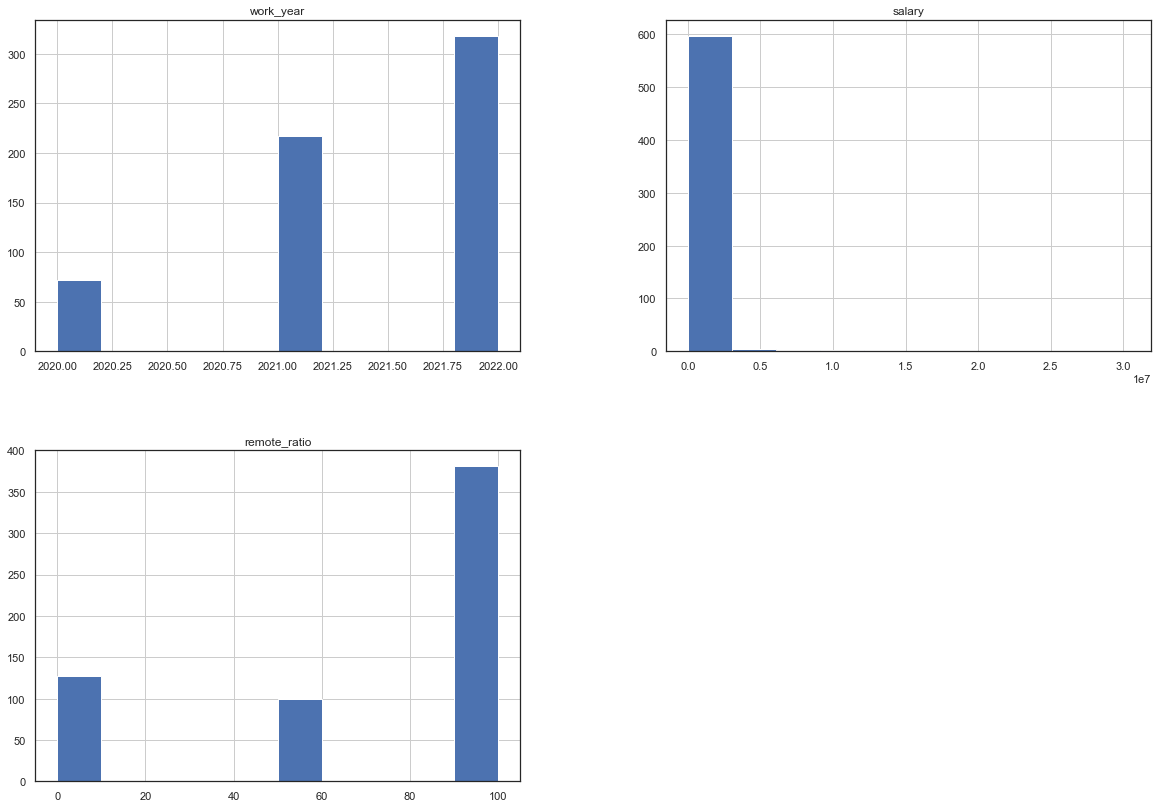

In [18]:
_ = salaries3.hist(figsize=(20, 14))

In [19]:
salaries3["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [20]:
salaries3["employment_type"].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [21]:
jobs = salaries3["job_title"].value_counts()
jobs

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Data Analytics Manager                        7
Principal Data Scientist                      7
Data Science Consultant                       7
Computer Vision Engineer                      6
Lead Data Engineer                            6
BI Data Analyst                               6
ML Engineer                                   6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist                  

In [22]:
salaries3["employee_residence"].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
BR      6
PT      6
PK      6
NL      5
PL      4
IT      4
RU      4
AU      3
AE      3
VN      3
AT      3
TR      3
SG      2
HU      2
DK      2
RO      2
NG      2
MX      2
SI      2
BE      2
IE      1
AR      1
CO      1
IQ      1
HR      1
PH      1
CN      1
MD      1
LU      1
MT      1
BO      1
MY      1
HN      1
UA      1
NZ      1
RS      1
IR      1
DZ      1
KE      1
CH      1
PR      1
CL      1
CZ      1
EE      1
HK      1
BG      1
JE      1
TN      1
Name: employee_residence, dtype: int64

In [23]:
salaries3["company_size"].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [24]:
salaries3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,RO,0,US,L


In [25]:
salaries3.drop(['salary','salary_currency'],axis=1,inplace=True)

In [26]:
salaries3.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,US,100,US,M
1,2022,SE,FT,Data Engineer,US,100,US,M
2,2021,MI,FT,BI Data Analyst,US,100,US,M
3,2021,MI,CT,ML Engineer,US,100,US,L
4,2021,MI,FT,Data Engineer,RO,0,US,L


In [27]:
salaries.groupby('experience_level').mean()

,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,
EN,2020.938462,310822.030769,59989.569231,70.769231
EX,2021.450000,492600.000000,196078.850000,80.000000
MI,2021.267442,485352.191860,90384.610465,65.116279
SE,2021.641975,220461.786008,136341.794239,76.131687


In [28]:
salaries3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0
company_location,607,50,US,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,607,3,M,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
salaries3=pd.get_dummies(salaries3, columns=['company_size'], drop_first=True)

salaries3.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size_M,company_size_S
0,2022,SE,FT,Data Engineer,US,100,US,1,0
1,2022,SE,FT,Data Engineer,US,100,US,1,0
2,2021,MI,FT,BI Data Analyst,US,100,US,1,0
3,2021,MI,CT,ML Engineer,US,100,US,0,0
4,2021,MI,FT,Data Engineer,RO,0,US,0,0


In [30]:
salaries3=pd.get_dummies(salaries3, columns=['experience_level'], drop_first=True)


In [31]:
salaries3.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Data Analytics Manager                        7
Principal Data Scientist                      7
Data Science Consultant                       7
Computer Vision Engineer                      6
Lead Data Engineer                            6
BI Data Analyst                               6
ML Engineer                                   6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist                  

In [32]:
def limpiar_job(column):
    if 'Scientist' in column:
        return 'Data Scientist'
    elif 'Engineer' in column:
        return 'Data Engineer'
    elif 'Analyst' in column:
        return 'Data Analyst '
    else:
        return 'Machine Learning Engineer'

In [33]:
salaries3['job_title'] = salaries3['job_title'].apply(limpiar_job)

In [34]:
salaries3.job_title.value_counts()

Data Engineer                230
Data Scientist               194
Data Analyst                 119
Machine Learning Engineer     64
Name: job_title, dtype: int64

In [35]:
salaries3=pd.get_dummies(salaries3, columns=['job_title'], drop_first=True)

salaries3.head()

,work_year,employment_type,employee_residence,remote_ratio,company_location,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer
0,2022,FT,US,100,US,1,0,0,0,1,1,0,0
1,2022,FT,US,100,US,1,0,0,0,1,1,0,0
2,2021,FT,US,100,US,1,0,0,1,0,0,0,0
3,2021,CT,US,100,US,0,0,0,1,0,1,0,0
4,2021,FT,RO,0,US,0,0,0,1,0,1,0,0


In [36]:
salaries3.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [37]:
salaries3=pd.get_dummies(salaries3, columns=['employment_type'], drop_first=True)

salaries3.head()

,work_year,employee_residence,remote_ratio,company_location,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,employment_type_FL,employment_type_FT,employment_type_PT
0,2022,US,100,US,1,0,0,0,1,1,0,0,0,1,0
1,2022,US,100,US,1,0,0,0,1,1,0,0,0,1,0
2,2021,US,100,US,1,0,0,1,0,0,0,0,0,1,0
3,2021,US,100,US,0,0,0,1,0,1,0,0,0,0,0
4,2021,RO,0,US,0,0,0,1,0,1,0,0,0,1,0


In [38]:
#salaries3.drop('employee_residence',axis=1,inplace=True)

In [39]:
salaries3["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PT      4
AT      4
PL      4
NL      4
PK      3
DK      3
AU      3
BR      3
AE      3
TR      3
LU      3
MX      3
CH      2
IT      2
CZ      2
RU      2
BE      2
SI      2
NG      2
CN      2
MT      1
HN      1
IL      1
RO      1
SG      1
CO      1
IQ      1
HR      1
NZ      1
HU      1
IR      1
DZ      1
EE      1
UA      1
CL      1
KE      1
VN      1
IE      1
AS      1
MD      1
MY      1
Name: company_location, dtype: int64

In [40]:
prueba = salaries.groupby('company_location').mean()
prueba = prueba.reset_index()
prueba

,company_location,work_year,salary,salary_in_usd,remote_ratio
0,AE,2021.333333,1.000000e+05,100000.000000,66.666667
1,AS,2021.000000,1.335000e+06,18053.000000,100.000000
2,AT,2020.666667,6.800000e+04,76738.666667,16.666667
3,AU,2022.000000,1.205000e+05,87064.000000,75.000000
4,BE,2021.000000,7.250000e+04,85699.000000,75.000000
5,BR,2021.000000,6.300000e+04,21453.500000,50.000000
6,CA,2021.520000,1.169680e+05,101037.360000,78.000000
7,CH,2021.500000,2.750000e+05,64114.000000,0.000000
8,CL,2021.000000,3.040000e+07,40038.000000,100.000000
9,CN,2021.000000,1.000000e+05,100000.000000,0.000000


In [41]:
sorted_countries = list(salaries2["company_location"].value_counts().index)
number_of_employees = salaries2["company_location"].value_counts()
len(number_of_employees)

43

In [42]:
#prueba["company_location"] = pd.Categorical(prueba["company_location"], categories = sorted_countries)
a = prueba.sort_values(by = "company_location")
#a
a

,company_location,work_year,salary,salary_in_usd,remote_ratio
0,AE,2021.333333,1.000000e+05,100000.000000,66.666667
1,AS,2021.000000,1.335000e+06,18053.000000,100.000000
2,AT,2020.666667,6.800000e+04,76738.666667,16.666667
3,AU,2022.000000,1.205000e+05,87064.000000,75.000000
4,BE,2021.000000,7.250000e+04,85699.000000,75.000000
5,BR,2021.000000,6.300000e+04,21453.500000,50.000000
6,CA,2021.520000,1.169680e+05,101037.360000,78.000000
7,CH,2021.500000,2.750000e+05,64114.000000,0.000000
8,CL,2021.000000,3.040000e+07,40038.000000,100.000000
9,CN,2021.000000,1.000000e+05,100000.000000,0.000000


In [43]:
b =  a.sort_values(by=['salary_in_usd'], ascending=False)
#a['company_location'] = number_of_employees.values
#a
b
super_high = ['US','NZ','CA','CA','AE','CN','DZ','SG','DK','JP','AU','BE']
high = ['DE','GB','AT','PL','IE','CZ','FR','CH','SI','RO','NL']
medium=['GR','ES','PT','LU','CL','HU','EE','IN','NG','MT']
28369.000000

28369.0

In [44]:
#a['mean_salary']= a['salary_in_usd']/a['employee_number']
#a

In [45]:
number_of_employees.values

array([296,  41,  25,  23,  19,  12,  12,  10,   4,   4,   4,   3,   3,
         3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1])

In [46]:
#b =  a.sort_values(by=['salary_in_usd'], ascending=False)
#b['number'] = number_of_employees.values
#b

In [47]:
#Esto no porque da una media de salario para algunos paises que no tiene sentido 
#b['mean_salary']= b['salary_in_usd']/b['number']
#b

In [48]:
b.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company_location,43,43,US,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_year,43.0,NaN,NaN,NaN,2021.074785,0.463527,2020.0,2021.0,2021.0,2021.25,2022.0
salary,43.0,NaN,NaN,NaN,1227637.350887,4911417.093762,4000.0,40216.666667,65000.0,120250.0,30400000.0
salary_in_usd,43.0,NaN,NaN,NaN,56144.360393,35382.778372,2859.0,24911.25,54945.75,85501.152174,144892.682432
remote_ratio,43.0,NaN,NaN,NaN,60.375253,32.912802,0.0,50.0,51.219512,89.583333,100.0


In [49]:
b

,company_location,work_year,salary,salary_in_usd,remote_ratio
41,US,2021.564189,1.596096e+05,144892.682432,79.054054
32,NZ,2020.000000,1.250000e+05,125000.000000,50.000000
6,CA,2021.520000,1.169680e+05,101037.360000,78.000000
0,AE,2021.333333,1.000000e+05,100000.000000,66.666667
9,CN,2021.000000,1.000000e+05,100000.000000,0.000000
13,DZ,2022.000000,1.000000e+05,100000.000000,50.000000
37,SG,2021.000000,1.200000e+05,89294.000000,50.000000
12,DK,2021.000000,7.500000e+04,88654.000000,100.000000
24,JP,2020.750000,5.029500e+06,87691.000000,50.000000
3,AU,2022.000000,1.205000e+05,87064.000000,75.000000


In [50]:
'''new_company=[]
for e in b.salary_in_usd:
    if e>= 85501.152174 and e <= 144892.682434: 
        new_company.append('high')
    elif e>= 54945.75 and e<= 85501.152174:
        new_company.append('medium')
    elif e >= 24911.25 and e<= 54945.75:
        new_company.append('low')
    else:
        new_company.append('super_low') ''' 

"new_company=[]\nfor e in b.salary_in_usd:\n    if e>= 85501.152174 and e <= 144892.682434: \n        new_company.append('high')\n    elif e>= 54945.75 and e<= 85501.152174:\n        new_company.append('medium')\n    elif e >= 24911.25 and e<= 54945.75:\n        new_company.append('low')\n    else:\n        new_company.append('super_low') "

In [51]:
#b.company_location= new_company

In [52]:
#b

In [53]:
#salaries3.company_location=b.company_location

In [54]:
salaries3

,work_year,employee_residence,remote_ratio,company_location,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,employment_type_FL,employment_type_FT,employment_type_PT
0,2022,US,100,US,1,0,0,0,1,1,0,0,0,1,0
1,2022,US,100,US,1,0,0,0,1,1,0,0,0,1,0
2,2021,US,100,US,1,0,0,1,0,0,0,0,0,1,0
3,2021,US,100,US,0,0,0,1,0,1,0,0,0,0,0
4,2021,RO,0,US,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,US,100,US,1,0,0,0,1,0,0,0,0,1,0
603,2022,US,100,US,1,0,0,0,1,0,0,1,0,1,0
604,2022,US,100,US,1,0,0,0,1,0,1,0,0,1,0
605,2022,CA,0,CA,1,0,0,0,0,0,0,0,0,1,0


In [55]:
super_high = ['US','NZ','CA','CA','AE','CN','DZ','SG','DK','JP','AU','BE']
high = ['DE','GB','AT','PL','IE','CZ','FR','CH','SI','RO','NL']
medium=['GR','ES','PT','LU','CL','HU','EE','IN','NG','MT']

In [56]:
new_location = []
for e in salaries3.company_location:
    if e in super_high:
        new_location.append('super_high')
    elif e in high:
        new_location.append('high')
    elif e in medium:
        new_location.append('medium')
    else:
        new_location.append('low')


        


In [57]:
salaries3.company_location = new_location

In [58]:
salaries3.drop('employee_residence',axis=1, inplace=True)

In [59]:
salaries3

,work_year,remote_ratio,company_location,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,employment_type_FL,employment_type_FT,employment_type_PT
0,2022,100,super_high,1,0,0,0,1,1,0,0,0,1,0
1,2022,100,super_high,1,0,0,0,1,1,0,0,0,1,0
2,2021,100,super_high,1,0,0,1,0,0,0,0,0,1,0
3,2021,100,super_high,0,0,0,1,0,1,0,0,0,0,0
4,2021,0,super_high,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,100,super_high,1,0,0,0,1,0,0,0,0,1,0
603,2022,100,super_high,1,0,0,0,1,0,0,1,0,1,0
604,2022,100,super_high,1,0,0,0,1,0,1,0,0,1,0
605,2022,0,super_high,1,0,0,0,0,0,0,0,0,1,0


In [60]:
salaries3=pd.get_dummies(salaries3, columns=['company_location'], drop_first=True)

salaries3.head()

,work_year,remote_ratio,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,employment_type_FL,employment_type_FT,employment_type_PT,company_location_low,company_location_medium,company_location_super_high
0,2022,100,1,0,0,0,1,1,0,0,0,1,0,0,0,1
1,2022,100,1,0,0,0,1,1,0,0,0,1,0,0,0,1
2,2021,100,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,2021,100,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,2021,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [61]:
salaries4 = salaries3.iloc[:500,:]
testeofin= salaries3.iloc[500:,:]

In [62]:
testeofin.reset_index()

,index,work_year,remote_ratio,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,employment_type_FL,employment_type_FT,employment_type_PT,company_location_low,company_location_medium,company_location_super_high
0,500,2020,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
1,501,2020,100,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,502,2020,100,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,503,2020,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
4,504,2020,100,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,602,2022,100,1,0,0,0,1,0,0,0,0,1,0,0,0,1
103,603,2022,100,1,0,0,0,1,0,0,1,0,1,0,0,0,1
104,604,2022,100,1,0,0,0,1,0,1,0,0,1,0,0,0,1
105,605,2022,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [63]:
testeofin.reset_index(inplace=True)

In [64]:
testeofin

,index,work_year,remote_ratio,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,employment_type_FL,employment_type_FT,employment_type_PT,company_location_low,company_location_medium,company_location_super_high
0,500,2020,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
1,501,2020,100,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,502,2020,100,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,503,2020,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
4,504,2020,100,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,602,2022,100,1,0,0,0,1,0,0,0,0,1,0,0,0,1
103,603,2022,100,1,0,0,0,1,0,0,1,0,1,0,0,0,1
104,604,2022,100,1,0,0,0,1,0,1,0,0,1,0,0,0,1
105,605,2022,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [65]:
testeofin.drop('index',axis=1,inplace=True)

/var/folders/0p/q9p3n_m96v7fgw9v0l4dvkyr0000gn/T/ipykernel_20011/312315580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testeofin.drop('index',axis=1,inplace=True)


In [66]:
testeofin

,work_year,remote_ratio,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,employment_type_FL,employment_type_FT,employment_type_PT,company_location_low,company_location_medium,company_location_super_high
0,2020,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
1,2020,100,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,2020,100,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,2020,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
4,2020,100,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2022,100,1,0,0,0,1,0,0,0,0,1,0,0,0,1
103,2022,100,1,0,0,0,1,0,0,1,0,1,0,0,0,1
104,2022,100,1,0,0,0,1,0,1,0,0,1,0,0,0,1
105,2022,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [67]:
salaries4.head()

,work_year,remote_ratio,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,employment_type_FL,employment_type_FT,employment_type_PT,company_location_low,company_location_medium,company_location_super_high
0,2022,100,1,0,0,0,1,1,0,0,0,1,0,0,0,1
1,2022,100,1,0,0,0,1,1,0,0,0,1,0,0,0,1
2,2021,100,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,2021,100,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,2021,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [68]:
testeofin.shape

(107, 16)

In [69]:
salaries4.shape

(500, 16)

In [70]:
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.model_selection import train_test_split as tts      # el alias es mio


In [71]:
rfr=RFR()


In [72]:
X_train, X_test, y_train, y_test = tts(salaries4, y, train_size=0.8, test_size=0.2, random_state=22)


In [73]:
len(y_train)

400

In [74]:
rfr.fit(X_train, y_train)


RandomForestRegressor()

In [75]:
y_pred_rf = rfr.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error as mse   


In [77]:
mse(y_test, y_pred, squared=False)

NameError: name 'y_pred' is not defined

In [78]:
rfr.fit(salaries4,y)


RandomForestRegressor()

In [79]:
y_pred_test = rfr.predict(testeofin)

In [80]:
y_pred_test

array([169272.14333333, 133153.78666667, 133153.78666667, 129284.22666667,
        29356.31028571,  22478.81      , 296747.59630952,  79678.11861203,
        66866.66383333, 201642.29437229, 102166.70133333, 228345.65833333,
        75630.15      ,  14062.73      ,  26558.39466667,  71899.22359524,
        87083.30633333, 135940.24630925,  72309.6695    , 104551.15316017,
       114859.97028788,  64586.46707456, 137055.49659524, 140045.96369926,
        30315.66      ,  13178.08      ,  70330.17566667, 139160.80111111,
        11847.26666667,  31280.46333333,  29927.72      , 133895.62738817,
        65607.02      ,  72864.48707143,  14686.57      ,  63489.48749206,
       140045.96369926,   6793.89      ,  30726.90533333, 175546.74316739,
        65675.277     ,  32124.81      , 203891.72606061, 189076.06707143,
        71041.69866667, 199794.64069264, 100303.655     ,  30726.90533333,
       133895.62738817,  43516.478     , 151581.89014286,  14347.28666667,
       110487.02619048, 1

In [81]:
muestra.salary_in_usd = y_pred_test

In [82]:
error1 = muestra.copy()

In [83]:
error1.to_csv('../data/error1.csv', index=False)



In [84]:
from sklearn.svm import SVR  

In [85]:
svr=SVR()

In [86]:
svr.fit(X_train, y_train)

SVR()

In [87]:
y_pred_svr = svr.predict(X_test)

In [88]:
mse(y_test, y_pred, squared=False)

NameError: name 'y_pred' is not defined

In [89]:
svr.fit(salaries4,y)


SVR()

In [90]:
y_pred_svr = rfr.predict(testeofin)

In [91]:
muestra.salary_in_usd = y_pred_svr

In [92]:
error2 = muestra.copy()

In [93]:
error2.to_csv('../data/error2.csv', index=False)


In [94]:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [95]:
salaries4[['work_year','remote_ratio']] = scaler.fit_transform(salaries4[['work_year','remote_ratio']])


/var/folders/0p/q9p3n_m96v7fgw9v0l4dvkyr0000gn/T/ipykernel_20011/1439043548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries4[['work_year','remote_ratio']] = scaler.fit_transform(salaries4[['work_year','remote_ratio']])


In [96]:
salaries4.head()

,work_year,remote_ratio,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,employment_type_FL,employment_type_FT,employment_type_PT,company_location_low,company_location_medium,company_location_super_high
0,0.857874,0.697464,1,0,0,0,1,1,0,0,0,1,0,0,0,1
1,0.857874,0.697464,1,0,0,0,1,1,0,0,0,1,0,0,0,1
2,-0.606075,0.697464,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,-0.606075,0.697464,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,-0.606075,-1.775814,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [97]:
rfr2=RFR()

In [98]:
rfr2.fit(X_train, y_train)


RandomForestRegressor()

In [99]:
y_pred_rf2 = rfr2.predict(X_test)

In [100]:
mse(y_test, y_pred2, squared=False)

NameError: name 'y_pred2' is not defined

In [101]:
rfr2.fit(salaries4,y)


RandomForestRegressor()

In [102]:
y_pred_test2 = rfr2.predict(testeofin)

In [103]:
muestra.salary_in_usd = y_pred_test2

In [104]:
error3 = muestra.copy()

In [105]:
error3.to_csv('../data/error3.csv', index=False)


In [109]:
x_train, x_test, y_train, y_test = tts(salaries4, y, train_size=0.8, test_size=0.2, random_state=22)
x_train, x_test, y_train, y_test

(     work_year  remote_ratio  company_size_M  company_size_S  \
 94    0.857874     -1.775814               1               0   
 350  -2.070023      0.697464               0               1   
 288  -0.606075      0.697464               0               1   
 420  -0.606075     -0.539175               1               0   
 163  -2.070023     -0.539175               1               0   
 ..         ...           ...             ...             ...   
 356  -0.606075     -0.539175               1               0   
 448  -2.070023     -0.539175               0               0   
 300   0.857874     -1.775814               1               0   
 132  -0.606075     -0.539175               0               0   
 373  -0.606075      0.697464               0               0   
 
      experience_level_EX  experience_level_MI  experience_level_SE  \
 94                     0                    0                    1   
 350                    0                    0                    0   
 288 

In [112]:
%pip install xgboost

     |████████████████████████████████| 1.8 MB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [113]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from catboost import CatBoostRegressor as CTR
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso    
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 

In [114]:
def predecir(x_train, x_test, y_train, y_test):
    #inicializamos todos los modelos que vamos a probar
    svr=SVR()
    rfr=RFR()
    etr=ETR()
    gbr=GBR()
    xgbr=XGBR()
    ctr=CTR()
    linreg=LinReg()
    lasso=Lasso()
    ridge=Ridge()
    elastic=ElasticNet()
    #los entrenamos
    svr.fit(x_train, y_train)
    rfr.fit(x_train, y_train)
    etr.fit(x_train, y_train)
    gbr.fit(x_train, y_train)
    xgbr.fit(x_train, y_train)
    ctr.fit(x_train, y_train, verbose=0)
    linreg.fit(x_train, y_train)
    lasso.fit(x_train, y_train)
    ridge.fit(x_train, y_train)
    elastic.fit(x_train, y_train)
    #predecimos
    y_pred1 = svr.predict(x_test)
    y_pred2 = rfr.predict(x_test)
    y_pred3 = etr.predict(x_test)
    y_pred4 = gbr.predict(x_test)
    y_pred5 = xgbr.predict(x_test)
    y_pred6 = ctr.predict(x_test)
    y_pred7 = linreg.predict(x_test)
    y_pred8 = lasso.predict(x_test)
    y_pred9 = ridge.predict(x_test)
    y_pred10 = elastic.predict(x_test)
    #calculamos error cuadrático medio (mse)
    mse1 = mse(y_test, y_pred1, squared=False)
    mse2 = mse(y_test, y_pred2, squared=False)
    mse3 = mse(y_test, y_pred3, squared=False)
    mse4 = mse(y_test, y_pred4, squared=False)
    mse5 = mse(y_test, y_pred5, squared=False)
    mse6 = mse(y_test, y_pred6, squared=False)
    mse7 = mse(y_test, y_pred7, squared=False)
    mse8 = mse(y_test, y_pred8, squared=False)
    mse9 = mse(y_test, y_pred9, squared=False)
    mse10 = mse(y_test, y_pred10, squared=False)
    #creamos una lista con todos los mse
    temp = [mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9, mse10]
    #pedimos a la función que nos devuelva el valor más bajo de mse
    minimo = min(temp)
    #le ponemos un mensajito para que quede más mono
    if minimo == mse1:
        return f'El mejor modelo es SVR con un mse de {mse1}'
    elif minimo == mse2:
        return f'El mejor modelo es RFR con un mse de {mse2}'
    elif minimo == mse3:
        return f'El mejor modelo es ETR con un mse de {mse3}'
    elif minimo == mse4:
        return f'El mejor modelo es GBR con un mse de {mse4}'
    elif minimo == mse5:
        return f'El mejor modelo es XGBR con un mse de {mse5}'
    elif minimo == mse6:
        return f'El mejor modelo es CTR con un mse de {mse6}'
    elif minimo == mse7:
        return f'El mejor modelo es LINREG con un mse de {mse7}'
    elif minimo == mse8:
        return f'El mejor modelo es LASSO con un mse de {mse8}'
    elif minimo == mse9:
        return f'El mejor modelo es RIDGE con un mse de {mse9}'
    elif minimo == mse10:
        return f'El mejor modelo es ELASTIC con un mse de {mse10}'

In [115]:
predecir(x_train, x_test, y_train, y_test)

'El mejor modelo es LASSO con un mse de 35697.762015852815'

In [121]:
lasso=Lasso()
lasso.fit(x_train, y_train)


Lasso()

In [122]:
y_pred8 = lasso.predict(x_test)

In [124]:
mse8 = mse(y_test, y_pred8, squared=False)

In [125]:
mse8

35697.762015852815

In [123]:
y_predlasso = lasso.predict(testeofin)

In [126]:
muestra.salary_in_usd = y_predlasso

In [128]:
error4 = muestra.copy()

In [129]:
error4.to_csv('../data/error4.csv', index=False)
